In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Imports for trees

In [3]:
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer

## Tree-based methods for Regression and Classification

Tree-based methods are non-parametric supervised learning methods for classification and regression.

These methods learn simple decision rules inferred from the training data to predict target values.

Tree methods segment the feature space into regions based on Decision (Splitting) rules. Trees are a representation of these rules.


In [4]:
Hitters = pd.read_csv("Hitters.csv")
Hitters = Hitters.dropna()
Hitters = Hitters.drop(['League','Division','NewLeague'],axis = 1)
Hitters['LogSalary'] = np.log(Hitters.Salary)
Hitters.tail()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks  PutOuts  Assists  Errors  Salary  LogSalary  
317    379   311     138      325        9       3   700.0   6.551080  
318    897   451     875      313      381      20   875.0   6.774224  
319    217    93     146       37      113       7   385.0   5.953243  
320    470   420     332     1314      131      12   960.0   6.866933  
321    775   357     249      408        4       3  1000.0   6.907755

#### Tree

A tree represents a sequence of binary decisions of which feature and feature value to split on.

Trees are built based on Training data.

The Root node is the node at the top of the tree
Leaf (terminal) nodes are the lowest nodes. They contains value or class of target variable.



![](simpleDecisionTree1.png)
$$\text{Figure 1. Simple Decision Tree}$$

1. Split on Years < 4.5
2. Split on Hits < 117.5
 

#### Divides the space into regions ($R_1, R_2, R_3, ...$)

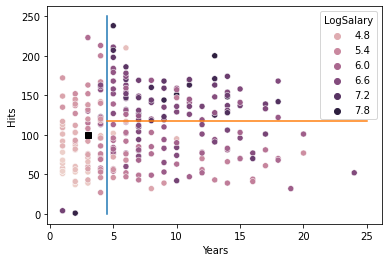

In [5]:
sns.scatterplot(x = 'Years',y='Hits',hue='LogSalary',data = Hitters)
plt.plot([4.5,4.5],[0,250])
plt.plot([4.5,25],[117.5,117.5])
plt.plot(3,100,color = 'black',marker = 's');


#### Prediction

 Predict new observation by transversing the tree from the top according to the features and feature values of the new data point.

For new point (black square) assign value or class based on a metric of other points in the region (i.e. node).

### History


CART (Breiman et. al., 1984): Classification and Regression Trees.

CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

sklearn uses an optimized version of CART except **Independent variables can not be categorical** at this time.

Quinlan: ID3(1986), C4.5(1993), C5.0, only for Classification Trees.


### Recursive Binary Splitting (a top-down greedy algorithm)

Given feature vector $X \in R^p$, it is computationally infeasible to consider every possible partition of the feature space into regions.  

![](Regions_tree.png)
$$\text{Figure 2. Regions and Tree produced by Recursive Bianry Splitting}$$

Top-down: begins at the top of the tree and then successively splits the predictor space.

This is a **greedy** algorithm. At each step of the tree-building process, the best split is made at that particular step. No look ahead to pick a split that will lead to a better tree in some future step.

The predictor ($X_j$) and the cutpoints (s) are selected such that splitting the space into the regions {X|$X_j$ < s} and {X|$X_j$ >  s} leads to the greatest possible reduction in some Regression or Classification metric.

The process is repeated on the resulting regions.

The process is continued until a stopping criterion is reached.

A feature can be used multiple times with different values.



## Regression Trees

Data: $(x_1,y_1),(x_2,y_2),...(x_n,y_n)$, $x_i \in R^d$, $y_i \in R$
 
Goal: Find regions $R_1,R_2,...,R_j$ to minimize Mean Squared Error (MSE) or Mean Absolute Error (MAE)

Determine which of the d features to split on and which value of the feature.

#### Regression Prediction

Response of new observation is the mean of the training observations in the region to which the new observation belongs

### Regression Metrics

Given Node m representing a region $R_m$ with $N_m$ observations ($x_i,y_i)$  

The mean response for the training observations within the ith region is:

$$\bar{y} = \frac{1}{N_m}\sum_{i\in{N_m}}y_i$$

$X_m$ is the training data in node m

#### $H(X_m)$ is called the impurity function.
We want nodes to be pure

#### Mean Squared Error:Minimizes L2 Error 

$$H(X_m) = \frac{1}{N_m}\sum_{i \in {N_m}}(y_i - \bar{y}_m)^2 $$

#### Mean Absolute Error: Minimizes L1 Error 

$$H(X_m) = \frac{1}{N_m}\sum_{i \in {N_m}}|y_i - \bar{y}_m| $$
 

###  Overfitting   

Decision Tree learning tends to make overly complex models which overfit

Reduce size of tree since a smaller tree will have less variance: 
- Limit the depth of the tree
- Set the minimum number of samples required at a leaf node

sklearn uses Minimal Cost-Complexity (see Appendix) to reduce tree size
    

### Fitting Regression Trees in sklearn

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

#### Parameters

criterion - the function to measure the quality of the split

- 'mse'
- 'friedman_mse'
- 'mae'

max_depth: control size by limiting tree depth

min_samples_split: minimum # of samples required to split an internal node

min_samples_leaf: control size by setting minimum number of samples at leaf nodes

random_state: To obtain a deterministic behavior during fitting, set random_state.

ccp_alpha: cost-complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.

In [13]:
#feats = ['Years','Hits']
feats = Hitters.columns.tolist()[:-2] # All the features
X = Hitters.loc[:,feats].values
y = Hitters.loc[:,'Salary'].values
X.shape,y.shape

((263, 16), (263,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((197, 16), (66, 16), (197,), (66,))

In [15]:
# Fit Tree to Training data
dt = DecisionTreeRegressor(random_state = 1234)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [16]:
# Predict the Test data
y_pred = dt.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print("Test error is: ",mse)

Test error is:  137063.9272000303


In [17]:
R2 = dt.score(X_test,y_test);R2
print(f'R-squared = {np.round(R2,3)}')

R-squared = 0.536


In [18]:

vals = dt.feature_importances_
pairs = [(vals[i],feats[i]) for i in range(len(vals))]
pairs.sort(reverse=True)
for val,feat in pairs:
 print(feat,'\t',round(val,6))


CHits 	 0.388989
CWalks 	 0.168324
AtBat 	 0.150901
Runs 	 0.055334
CRBI 	 0.053743
Walks 	 0.046251
HmRun 	 0.033541
CAtBat 	 0.033231
Assists 	 0.025148
PutOuts 	 0.015695
Errors 	 0.011589
CRuns 	 0.007317
RBI 	 0.006249
Hits 	 0.001965
Years 	 0.001427
CHmRun 	 0.000295


#### 10-fold Cross Validation

[ 0.34475315  0.75488939  0.59906393  0.26972567  0.39909365  0.19479386
  0.42175835 -0.04737039  0.1537412  -0.4163741 ]
0.2674074707471733


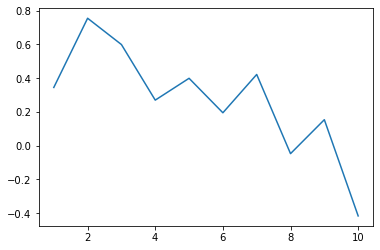

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X,y, cv=10)
print(scores)
print(np.mean(scores))
plt.plot(range(1,11),scores);

## Classification Trees
 
Goal:  Predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs.
    
Classes should be balanced to avoid  creating biased trees 


#### Predictions

Response of new observation is the class the has the high proportion of observations in the region to which the new observation belongs

### Classification Metrics 

Given Node m representing a region $R_m$ with $N_m$ observations ($x_i,y_i)$  

The proportion if class k observations in node m is:

$$ p_{mk} = \frac{1}{N_m}\sum_{x_i \in R_m}I(y_i ==k)$$

$X_m$ is the training data for node m

#### Gini impurity


    
$$H(X_m) = \sum_{k=1}^Kp_{mk}(1-p_{mk})$$
 
where $p_{mk}$ is the proportion of training observations in the mth region that are from the kth class. It takes on a small value if all of the $p_{mk}$s are close to
zero or one.

Node purity: a small value indicates that a node contains predominantly observations from a single class.
 
#### Information Entropy (Average Information)

See Appendix
 
$$H(X_m) = -\sum_{k=1}^Kp_{mk}log(p_{mk})$$

In most cases the Gini and Entropy metrics produce the same results

#### Misclassification

$$H(X_m) = 1 - max(p_{mk})$$

Not widely used because not sensitive enough

### Fitting Classification Trees in sklearn

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

#### Parameters

criterion: the function to measure the quality of the split:

- 'gini'
- 'entropy'

max_depth: control size by limiting tree depth

min_samples_split: minimum # of samples required to split an internal node

min_samples_leaf: control size by setting minimum number of samples at leaf nodes

random_state: To obtain a deterministic behavior during fitting, set random_state.

ccp_alpha: cost-complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen

In [20]:
Wine = pd.read_csv("Wine.csv")
feats = Wine.columns[0:-1]
print(len(feats))
Wine.head()

13


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [21]:
X = Wine.iloc[:,0:13].values
y = Wine.iloc[:,13].values


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = 0.25, random_state = 1234)

In [23]:
# Build decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
# Predict the Test data
y_pred = dt.predict(X_test)

# Make  the Confusion Matrix and calculate  model accuracy

cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ",round(np.trace(cm)/np.sum(cm),3))
cm

Accuracy:  0.956


array([[14,  1,  0],
       [ 0, 18,  0],
       [ 0,  1, 11]], dtype=int64)

#### 10-fold Cross Validation

[0.88888889 0.94444444 0.72222222 0.88888889 0.88888889 1.
 1.         0.94444444 1.         0.76470588]
Mean Accuracy:  0.904


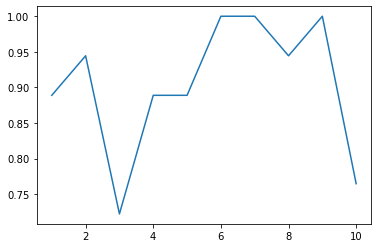

In [25]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
scores = cross_val_score(dt, X,y, cv=10, scoring = 'accuracy')
print(scores)
print("Mean Accuracy: ",round(np.mean(scores),3))
plt.plot(range(1,11),scores);

In [26]:
dt.n_features_

13

[Text(396.79999999999995, 475.65000000000003, 'X[6] <= 1.4\nentropy = 1.567\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(198.39999999999998, 339.75, 'X[9] <= 3.725\nentropy = 0.684\nsamples = 44\nvalue = [0, 8, 36]'),
 Text(99.19999999999999, 203.85000000000002, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(297.59999999999997, 203.85000000000002, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(595.1999999999999, 339.75, 'X[12] <= 724.5\nentropy = 1.0\nsamples = 89\nvalue = [44, 45, 0]'),
 Text(495.99999999999994, 203.85000000000002, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(694.3999999999999, 203.85000000000002, 'X[9] <= 3.49\nentropy = 0.342\nsamples = 47\nvalue = [44, 3, 0]'),
 Text(595.1999999999999, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(793.5999999999999, 67.94999999999999, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]')]

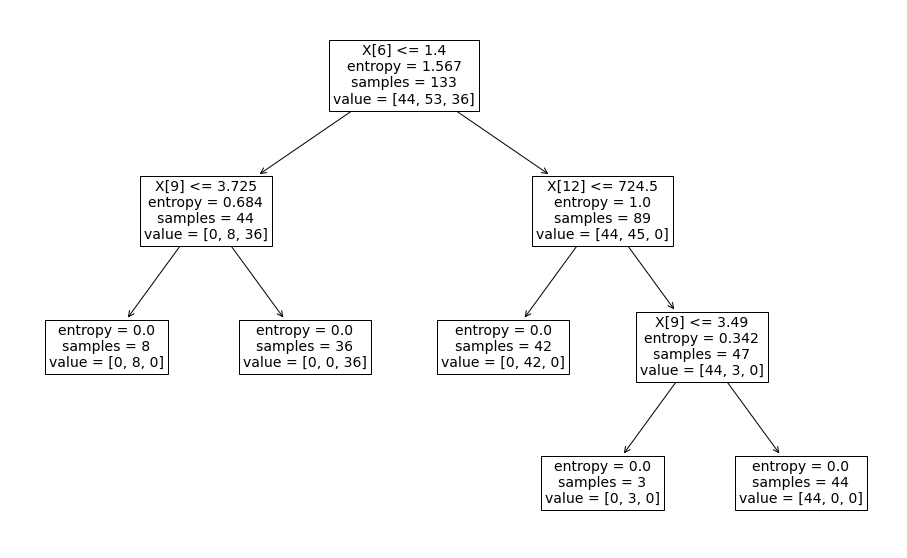

In [27]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt,fontsize=14)
#plt.savefig("wine.png",format='png');

### Pros

* Simple and interpretable. 
* Trees can be visualized  
* Requires little data preparation (e.g. no scaling)
* Rules for numerical, ordinal and categorical data
* Mirror human decision-making??   
 

### Cons
 
* Tends to overfit. Creates overly complex trees that do not generalize well. 
    - Need to prune trees 
* Highly variable. Small change in data can produce completely different tree
* Finding optimum tree is NP-Complete.
    - Use Greedy algorithm which may not produce the best tree 
* Prediction accuracy is not competitive with other approaches
    - But with Ensemble Methods (Bagging, Random Forests and Boosting) can produce results that surpass other common methods in use today


## Pruning decision trees with cost complexity pruning (CCP)

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

Cost Complexity Pruning controls the size of a tree to alleviate overfitting

The keyword ccp_alpha is the CCP parameter. Greater values increase number of nodes pruned.
    
The best value of ccp_alpha can be determined from accuracy scores

### Total impurity of leaves and alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest alpha are pruned first. 

scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path to determine the best  ccp_alpha. It returns the alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.



In [28]:
data = load_breast_cancer(as_frame=True)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [29]:
df = data['frame']
df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [30]:
X = data['data'].values
y = data['target'].values
X.shape,y.shape

((569, 30), (569,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state=0,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [32]:
model = DecisionTreeClassifier(random_state=0)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [33]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(path.keys())
print(ccp_alphas.shape,impurities.shape)
ccp_alphas

dict_keys(['ccp_alphas', 'impurities'])
(16,) (16,)


array([0.        , 0.00211268, 0.00232922, 0.00312989, 0.00417319,
       0.00435949, 0.00458677, 0.00467527, 0.00515511, 0.00625978,
       0.00698636, 0.01384016, 0.0172511 , 0.02253588, 0.02666621,
       0.33936051])

The maximum effective alpha value is removed, because it is the trivial tree with only one node.



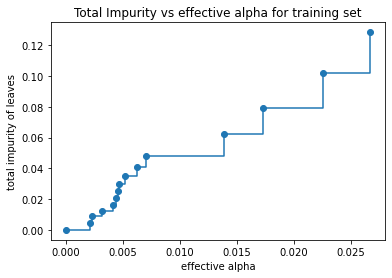

In [34]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

#### Train a decision tree using the effective alphas. 

The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the last tree with one node.



In [35]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
print(f"Number of nodes in the last tree is: {models[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3393605055932058


####  Show that the number of nodes and tree depth decreases as alpha increases.



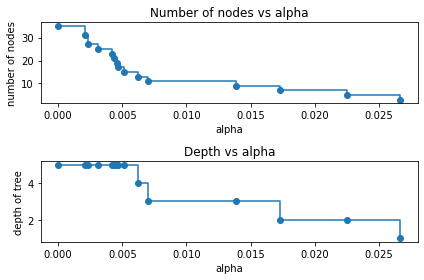

In [36]:
models = models[:-1] # Remove last element because it is the trivial tree with only one node
ccp_alphas = ccp_alphas[:-1]

node_counts = [m.tree_.node_count for m in models]
depth = [m.tree_.max_depth for m in models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

When ccp_alpha is set to zero and the other parameters are set to their default values the tree overfits with 100% training accuracy and 90% testing accuracy. As alpha increases, more of the tree is pruned which will generalize better.


In [37]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002112676056338029, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002329220802853295, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0031298904538341154, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004173187271778821, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004359490274983234, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0045867732733111104, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004675273865414691, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005155113688667954, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006259780907668231, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0069863626201654375, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.013840155945419104, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.01725109533725938, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.022535883071465004, random_state=0),
 Decisio

The best alpha is 0.006259780907668231


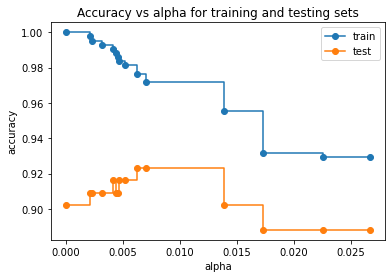

In [38]:
train_scores = [m.score(X_train, y_train) for m in models]
test_scores = [m.score(X_test, y_test) for m in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
print(f'The best alpha is {ccp_alphas[np.argmax(test_scores)]}')

### Reference


Figures 1 and 2 are taken from "An Introduction to Statistical Learning, with applications in R" (Springer, 2013) with permission from the authors: G. James, D. Witten, T. Hastie and R. Tibshirani "

## Appendixes

### Information Entropy
 
#### Information: The reduction in uncertainty derived from learning an outcome

Quantified by  minus the log probability of an event

<div style="font-size: 125%;">
$$ I = -log_2P(x)$$
</div>

x is an event, e.g. a coin flip came up heads

In [39]:
# Suppose P(X=heads) = 1/2, P(X = tails) = 1/2
from math import log

I = -log(1/2,2) #Base 2
print("{} bit of information".format(I))

1.0 bit of information


In [40]:
# Suppose P(X=heads) = 3/4, P(X = tails) = 1/4
I = -log(3/4,2)
print("{} bits of information".format(I))

0.4150374992788438 bits of information


P(x) = 3/4 > P(x) = 1/2, but I = -log(1/2,2) < I = -log(3/4,2)

Probability $\uparrow$ Information $\downarrow$


#### Information Entropy is the Average Information

Minus the Expected Value of Information
Suppose you have a 4-sided die with the probability of tossing a 1 = 1/2, a 2 = 1/4, 3 = 1/8, 4 =  1/8.

pmf = (1/2,1/4,1/8,1/8)  



<div style="font-size: 115%;">
$$ Entropy = H = -E(I) = -\sum_i p(x_i)*log(p(x_i))$$
</div>

$p(x_i)$ is a PMF
  

In [41]:
print("Entropy is: ",-1*(1/2*log(1/2,2) + 1/4*log(1/4,2) + 1/8*log(1/8,2) + 1/8*log(1/8,2)))

Entropy is:  1.75


#### Differential Entropy - Continuous RV

<div style="font-size: 115%;">
$$Entropy = H = -\int{p(x)*log(p(x)} dx$$
</div>

$p(x)$ is a PDF

### Minimal Cost-Complexity Pruning 

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting.

Minimal cost complexity pruning recursively finds the node with the "weakest link" where the weakest link is characterized by the complexity parameter $\alpha \ge 0$ The nodes with the smallest alpha are pruned first. 
    
#### Cost-complexity measure $R_{\alpha}(T)$ of a given tree T

$$R_{\alpha}(T) = R(T) + \alpha|T|$$

|T|: number of terminal nodes in T  
R(T): total sample impurity of the terminal nodes in T  

Minimal cost-complexity pruning finds the subtree of T that minimizes $R_{\alpha}(T)$
    
#### Effective $\alpha$

The cost complexity measure of a single node is $R_{\alpha}(t) = R(t) + \alpha$.

The branch $T_t$ is defined to be a tree where node t is the root node.

The **effective $\alpha$** of a node t is when  $R_{\alpha}(T_t) = R_{\alpha}(t)$ i.e. when cost complexity measure of a node, t , and its branch $T_t$ are equal:

$$ \alpha_{eff} = \frac{R(t) - R(T_t)}{|T|-1}$$

A non-terminal node with the smallest value of $\alpha_{eff}$ is the weakest link and will be pruned. 

Pruning stops when the tree’s minimal $\alpha_{eff}$ is greater than the ccp_alpha parameter in sklearn.

